In [126]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
import numpy as np

In [127]:
def initialize_s(qc, qubits):
    """Apply Hadamard gates to all qubits"""
    for q in qubits:
        qc.h(q)
    return qc


In [128]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    
    # Apply H gates to all qubits
    for qubit in range(nqubits):
        qc.h(qubit)
    
    # Apply X gates to all qubits
    for qubit in range(nqubits):
        qc.x(qubit)
    
    # Apply multi-controlled Z gate
    qc.h(nqubits-1)
    qc.ccx(0, 1, nqubits-1)  # Use CCX (Toffoli) gate for 3 qubits
    for qubit in range(2, nqubits-1):
        qc.cx(qubit, nqubits-1)
    qc.ccx(0, 1, nqubits-1)
    qc.h(nqubits-1)
    
    # Apply X gates to all qubits
    for qubit in range(nqubits):
        qc.x(qubit)
    
    # Apply H gates to all qubits
    for qubit in range(nqubits):
        qc.h(qubit)
    
    return qc

**Diffusion (Grover's Operator):**

- Performs "reflection about the mean".

- Amplifies marked state's amplitude, reduces others.

- Mathematically: 2|ψ⟩⟨ψ| - I

- Increases marked state's amplitude, decreases others.

In [129]:
def grover_algorithm(oracle, n):
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)
    
    print("Initializing superposition")
    initialize_s(qc, qr)
    
    iterations = int(np.pi/4 * np.sqrt(2**n))
    print(f"Number of iterations: {iterations}")
    
    for i in range(iterations):
        print(f"Iteration {i+1}")
        qc.append(oracle, qr)
        print("Oracle applied")
        qc.append(diffuser(n), qr)
        print("Diffuser applied")
    
    qc.measure(qr, cr)
    return qc

**Iteration and Amplification:**

- Repeat steps 2 and 3 approximately √N times.

- Each iteration increases sought state's amplitude.

- "Concentrates" probability on desired state.

In [130]:
# Example usage (you'll need to define your own oracle)
def example_oracle():
    qc = QuantumCircuit(3)
    qc.z(2)  # Aplica Z al tercer qubit
    qc.cz(0, 2)  # Aplica CZ entre el primer y tercer qubit
    return qc

**Oracle Application**

- Oracle recognizes the sought state and inverts its phase.

- Inverts the phase of the sought state we are looking for

- If |ω⟩ is the sought state: |ω⟩ → -|ω⟩

- Other states remain unchanged.

- Example searching for |10⟩: |ψ⟩ = (1/2)(|00⟩ + |01⟩ - |10⟩ + |11⟩)

Initializing superposition
Number of iterations: 2
Iteration 1
Oracle applied
Diffuser applied
Iteration 2
Oracle applied
Diffuser applied
Circuit depth: 6
Circuit size: 10
Counts: {'010': 1}


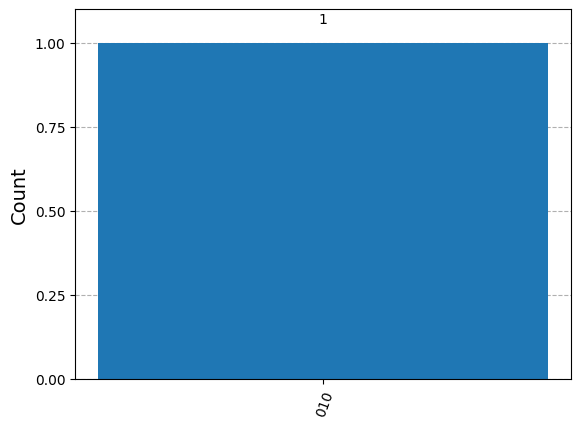

In [135]:
# En el código principal
oracle = example_oracle()
n = 3
grover_circuit = grover_algorithm(oracle, n)
print("Circuit depth:", grover_circuit.depth())
print("Circuit size:", grover_circuit.size())

simulator = AerSimulator()
transpiled_qc = transpile(grover_circuit, simulator)
job = simulator.run(transpiled_qc, shots=1)  # Aumentamos el número de shots
result = job.result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts)